In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns


# splitting The dataset into training and testing sets

In [14]:
# This code assumes you have a dataset in CSV format named 'phishing.csv'
# Load the dataset
df = pd.read_csv('phishing.csv')

# Split into features (X) and target (y)
X = df.drop('class', axis=1) 
y = df['class']

# Split into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert DataFrame / Series to NumPy arrays for compatibility with our tree
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()


# Discussion  tree classifier

In [10]:
from collections import Counter
#intropy function
def entropy(y):
    counts = Counter(y)
    total = len(y)
    ent = 0
    for count in counts.values():
        p = count / total
        ent -= p * np.log2(p)
    return ent

# Function to calculate information gain
def info_gain(y, left_indices, right_indices):
    y_left = y[left_indices]
    y_right = y[right_indices]
    parent_entropy = entropy(y)
    n = len(y)
    n_left = len(y_left)
    n_right = len(y_right)
    child_entropy = (n_left / n) * entropy(y_left) + (n_right / n) * entropy(y_right)
    gain = parent_entropy - child_entropy
    return gain

# Function to find the best split
import numpy as np

def best_split(X, y):
    best_feature = None
    best_threshold = None
    best_gain = -1

    n_samples, n_features = X.shape

    for feature in range(n_features):
        values = np.unique(X[:, feature])
        for threshold in values:
            left_indices = np.where(X[:, feature] <= threshold)[0]
            right_indices = np.where(X[:, feature] > threshold)[0]

            if len(left_indices) == 0 or len(right_indices) == 0:
                continue

            gain = info_gain(y, left_indices, right_indices)

            if gain > best_gain:
                best_gain = gain
                best_feature = feature
                best_threshold = threshold

    return best_feature, best_threshold, best_gain


class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value  # Only set for leaf nodes

def build_tree(X, y, depth=0, max_depth=None):
    # Stop if all labels are the same or max depth reached
    if len(set(y)) == 1:
        return Node(value=y[0])
    
    if max_depth is not None and depth >= max_depth:
        most_common = Counter(y).most_common(1)[0][0]
        return Node(value=most_common)

    # Find the best split
    feature, threshold, gain = best_split(X, y)
    if gain == 0:
        most_common = Counter(y).most_common(1)[0][0]
        return Node(value=most_common)

    # Split the dataset
    left_idx = np.where(X[:, feature] <= threshold)[0]
    right_idx = np.where(X[:, feature] > threshold)[0]

    left = build_tree(X[left_idx], y[left_idx], depth + 1, max_depth)
    right = build_tree(X[right_idx], y[right_idx], depth + 1, max_depth)

    return Node(feature, threshold, left, right)

def predict_sample(x, node):
    if node.value is not None:
        return node.value
    
    if x[node.feature] <= node.threshold:
        return predict_sample(x, node.left)
    else:
        return predict_sample(x, node.right)

def predict(X, tree):
    return np.array([predict_sample(x, tree) for x in X])
tree = build_tree(X_train, y_train, max_depth=5)
y_pred = predict(X_test, tree)

print("Accuracy:", accuracy_score(y_test, y_pred))




InvalidIndexError: (slice(None, None, None), 0)

In [22]:
import numpy as np
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        if len(set(y)) == 1 or depth >= self.max_depth:
            most_common = Counter(y).most_common(1)[0][0]
            return Node(value=most_common)

        feature, threshold, gain = best_split(X, y)
        if gain == 0:
            most_common = Counter(y).most_common(1)[0][0]
            return Node(value=most_common)

        left_idx = np.where(X[:, feature] <= threshold)[0]
        right_idx = np.where(X[:, feature] > threshold)[0]

        left = self._build_tree(X[left_idx], y[left_idx], depth + 1)
        right = self._build_tree(X[right_idx], y[right_idx], depth + 1)

        return Node(feature, threshold, left, right)

    def _predict(self, x, node):
        if node.is_leaf():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._predict(x, node.left)
        else:
            return self._predict(x, node.right)

    def predict(self, X):
        return np.array([self._predict(x, self.root) for x in X])

    def evaluate(self, X, y_true):
        y_pred = self.predict(X)
        print("\n📋 Classification Report:\n", classification_report(y_true, y_pred))

        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()


# Evaluating the Decision Tree Classifier By the dataset in the second cell


📋 Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.85      0.91       976
           1       0.89      0.98      0.93      1235

    accuracy                           0.92      2211
   macro avg       0.93      0.91      0.92      2211
weighted avg       0.93      0.92      0.92      2211



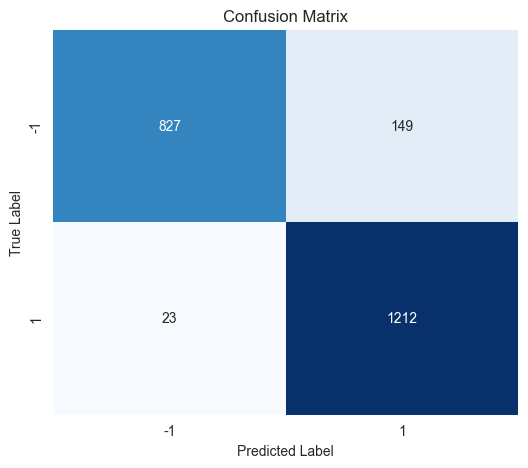

In [23]:
tree = DecisionTree(max_depth=5)
tree.fit(X_train_np, y_train_np)
tree.evaluate(X_test_np, y_test_np)



